# Agrupamento simples: K-Means
O K-Means é um dos algoritmos de cluster mais populares. Ele identifica K "centróides" que são usados para definir Clusters. Considera-se que um ponto está em um cluster específico se estiver mais próximo do percentil desse cluster do que qualquer outro centróide.



## Clustering Iris Dataset
Vamos utilizar o k-means para clusterizar os dados do dataset iris

In [1]:
# Carrega os dados 
from sklearn.datasets import load_iris
iris = load_iris()

# Imprime a descrição
print(iris.DESCR)



.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [2]:
data = iris.data
print("Número de amostras:", data.shape[0])
print("Número de atributos:", data.shape[1])

Número de amostras: 150
Número de atributos: 4


In [6]:
import matplotlib.pyplot as plt

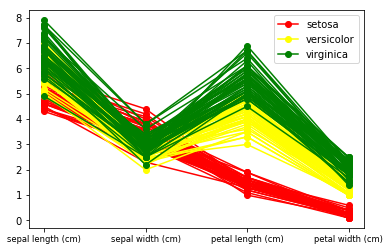

In [7]:
def plot_iris(X, y, x_axis, legend):
    # X est un numpy array qui contient les échantillons
    # y est un numpy array qui contient les classes 
    #  (le numéro du type de l'iris)
    # x_axis est une liste qui contient les noms des attributs
    #  (sepal length, sepal width,...)
    # legend est une liste qui contient les noms des classes 
    #  (le type de l'iris)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    colors = ['red', 'yellow', 'green']
    for i in range(len(colors)):
        start = True
        for xs in X[y == i]:
            if start:
                ax.plot(xs,'o-', c=colors[i], label=legend[i])
                start = False
            else:
                ax.plot(xs, 'o-', c=colors[i])
    plt.xticks(range(len(x_axis)), x_axis, size='small')
    plt.legend()
    plt.show()

def plot_iris_scatter(X, y, axis, legend, col1, col2):
    # col1 et col2 sont des nombre entier entre 0 et 3 inclus, 
    #  pour sélectionner deux attributs à visualiser
    colors = ['red', 'yellow', 'green']
    for i in range(len(colors)):
        xs = X[:, col1][y == i]
        ys = X[:, col2][y == i]
        plt.scatter(xs, ys, c = colors[i])
    plt.legend(legend)
    plt.xlabel(axis[col1])
    plt.ylabel(axis[col2])
    plt.show()

plot_iris(iris.data, iris.target, iris.feature_names, iris.target_names)



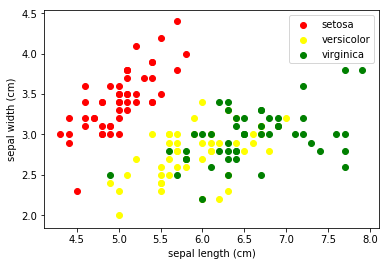

In [8]:
# Visualização com atributos 0 e 1 
plot_iris_scatter(iris.data, iris.target, iris.feature_names, 
                  iris.target_names,0, 1 )

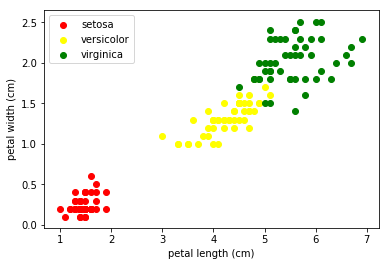

In [11]:
# Visualização com atributos 2 e 3

# SEU CÓDIGO AQUI
plot_iris_scatter(iris.data, iris.target, iris.feature_names, 
                  iris.target_names,2, 3 )

In [15]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [22]:
# Utilize train_test_split para dividir os dados 
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    test_size=0.25, 
                                                    random_state=40)
# Utilize o K-Means para clusterizar os dados. 
X = X_train[:,2:]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
def plot_iris_clusters(clf, X, y, axis, legend, loc='lower right'):
    h = .01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
    a = np.c_[xx.ravel(), yy.ravel()]
    z = clf.predict(a)
    z = z.reshape(xx.shape)
    plt.imshow(z, interpolation='nearest', 
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired, aspect='auto', origin='lower')
    colors = ['red', 'yellow', 'green']
    for i in range(len(colors)):
        xs = X[:, 0][y == i]
        ys = X[:, 1][y == i]
        plt.scatter(xs, ys, c = colors[i])
    plt.legend(legend, loc=loc)
    plt.xlabel(axis[0])
    plt.ylabel(axis[1])

    centroids = clf.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='.',
                s=169, linewidths=3, color='w', zorder=10)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()


In [24]:
import numpy as np

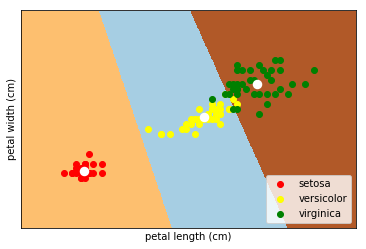

In [25]:
# Utilize a função plot_iris_clusters com os dados da aprendizagem para visualizar os clusters
plot_iris_clusters(kmeans, X, y_train, iris.feature_names[2:],
                  iris.target_names)

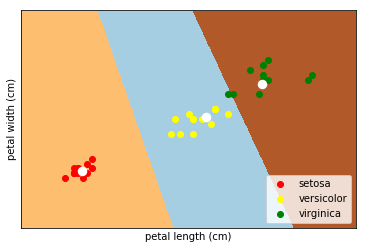

In [26]:
# Utilize a função plot_iris_clusters com os dados de teste para visualizar os clusters
X_eval = X_test[:,2:]
plot_iris_clusters(kmeans, X_eval, y_test, iris.feature_names[2:],
                  iris.target_names)

## Agrupando dígitos 
Veremos como o K-means funciona usando números de conjuntos de dados no scikit-learn.

In [27]:
import matplotlib.pyplot as plt


# Uma função para visualizar os dígitos
def print_digits(images, y, max_n=10):
    plt.figure(1)
    plt.clf()
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05
                        , wspace=0.05)
    i = 0
    while i < max_n and i<images.shape[0]:
        p = fig.add_subplot(20, 20, i+1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        p.text(0, 14, str(y[i]))
        i += 1
    plt.show()


<Figure size 432x288 with 0 Axes>

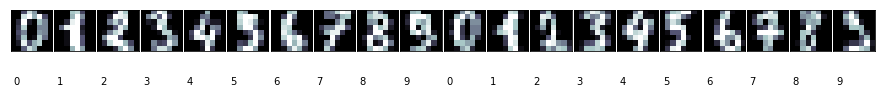

In [28]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

digits = load_digits()
print_digits(digits.images, digits.target, max_n=20)

Podemos ver as figuras (manuscritas) com as classes de destino abaixo. Não vamos usar essas classes porque estamos fazendo um aprendizado não supervisionado (Clustering).

Em seguida, testaremos se poderíamos reagrupar os números com base em suas semelhanças. Normalmente teremos 10 clusters.

In [29]:
from sklearn.model_selection import train_test_split

# Use train_test_split
X_train, X_test, y_train, y_test, images_train, images_test = \
train_test_split(
    digits.data, digits.target, digits.images, test_size=0.25,
    random_state=41)

print("Número de amostras::", digits.data.shape[0])
print("Número de atributos::", digits.data.shape[1])

Número de amostras:: 1797
Número de atributos:: 64


In [30]:
# Utilize a função unique para obter os valores dos labels
unique_labels = np.unique(digits.target)
print(unique_labels)

[0 1 2 3 4 5 6 7 8 9]


In [31]:
from sklearn.cluster import KMeans
# Utilize o K-Means para clusterizar o dataset de dígitos
clf = KMeans(init='k-means++', n_clusters=10)
clf.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

<Figure size 432x288 with 0 Axes>

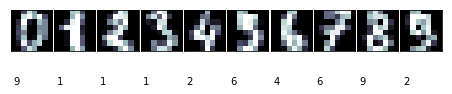

In [37]:
# Utilize a função print_digits para visualizar os clusters dos 10 primeiros dígitos
# para isso, passe como labels clf.labels_

## SEU CÓDIGO AQUI
print_digits(digits.images, clf.labels_, max_n=10)

In [40]:
# Utilize o método clf.predict (da mesma forma que no aprendizado supervisionado) para encontrar
# os clusters atribuídos aos dados de teste

## SEU CÓDIGO AQUI

ypred = clf.predict(X_test)

# Uma função para imprimir os dígitos de um determinado cluster
def print_cluster(images, y_pred, cluster_number):
    images = images[y_pred==cluster_number]
    y_pred = y_pred[y_pred==cluster_number]
    print_digits(images, y_pred, max_n=10)
    
# Utilize a função para imprimir os dígitos de cada um dos 10 clusters


## SEU CÓDIGO AQUI
for k in range(10):
    print_digits(digits.images, ypred, max_n=10,cluster_number=k)

TypeError: print_digits() got an unexpected keyword argument 'cluster_number'